In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# Load your data
df = pd.read_excel('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/Amazon/AmazonSaleReport.xlsx', parse_dates=['Date'], index_col='Date')
df = df.sort_index()
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,404-1445673-1345134,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,L,B098121HFD,...,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2022-03-31,406-7387241-2881923,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,XL,B08B415N6S,...,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
2022-03-31,402-9332104-0945115,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,M,B081X2TYBM,...,INR,416.19,GURGAON,HARYANA,122001.0,IN,NaN,False,Easy Ship,NaN
2022-03-31,408-1008226-2450750,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,...,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
2022-03-31,403-4108307-0229121,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,L,B07Q2P453R,...,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [17]:
df = pd.read_excel('./AmazonSaleReport.xlsx', parse_dates=['Date'], index_col='Date')
df = df.sort_index()
df.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,404-1445673-1345134,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,L,B098121HFD,...,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2022-03-31,406-7387241-2881923,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,XL,B08B415N6S,...,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
2022-03-31,402-9332104-0945115,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,M,B081X2TYBM,...,INR,416.19,GURGAON,HARYANA,122001.0,IN,NaN,False,Easy Ship,NaN
2022-03-31,408-1008226-2450750,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,...,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
2022-03-31,403-4108307-0229121,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,L,B07Q2P453R,...,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [3]:
# A little bit of data cleaning
df.drop(['Order ID', 'Status', 'Unnamed: 22', 'SKU', 'ASIN', 'Courier Status', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'Style'], axis=1, inplace=True)

# Getting dummies and changing column names
# Fullfillment
df['fulfilled-by'] = df['fulfilled-by'].apply(lambda x: True if x == 'Easy Ship' else False)
df.rename(columns={'fulfilled-by': 'fulfilledEasyShip'}, inplace=True)

# Fullfillment again?
df['Fulfilment'] = df['Fulfilment'].apply(lambda x: True if x == 'Amazon' else False)
df.rename(columns={'Fulfilment': 'FBA'}, inplace=True)

# Sales channel
df['Sales Channel '] = df['Sales Channel '].apply(lambda x: True if x == 'Amazon.in' else False)
df.rename(columns={'Sales Channel ': 'soldAmazonIn'}, inplace=True)

# Currency
df['currency'] = df['currency'].apply(lambda x: True if x == 'INR' else False)
df.rename(columns={'currency': 'paidINR'}, inplace=True)

# Ship-Service-Level
df['ship-service-level'] = df['ship-service-level'].apply(lambda x: True if x == 'Standard' else False)
df.rename(columns={'ship-service-level': 'standardShipping'}, inplace=True)

# Check if it has promotions, convert to boolean
df['promotion-ids'] = df['promotion-ids'].apply(lambda x: False if pd.isna(x) else True)

# Size
df_dummies = pd.get_dummies(df, columns=['Size'])

# Categories
categories_to_delete = ['Ethnic Dress', 'Blouse', 'Bottom', 'Saree', 'Dupatta']
df_dummies = df_dummies[~df_dummies['Category'].isin(categories_to_delete)]
df_dummies = pd.get_dummies(df_dummies, columns=['Category'])

# Drop NaNs
df_dummies.dropna(inplace=True)
df_dummies.head()


,FBA,soldAmazonIn,standardShipping,Qty,paidINR,Amount,promotion-ids,B2B,fulfilledEasyShip,Size_3XL,...,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL,Category_Set,Category_Top,Category_Western Dress,Category_kurta
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,False,True,True,1,True,495.00,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2022-03-31,True,True,False,1,True,599.00,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2022-03-31,False,True,True,0,True,416.19,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
2022-03-31,True,True,False,1,True,449.00,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2022-03-31,True,True,False,1,True,542.00,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


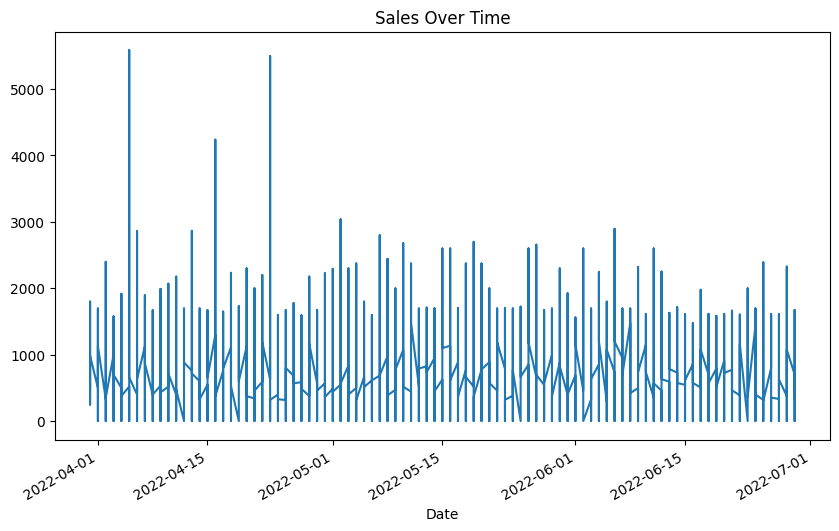

In [4]:
# Plot the time series
df_dummies['Amount'].plot(figsize=(10, 6))
plt.title('Sales Over Time')
plt.show()

In [5]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
# We do not shuffle the data because the order is important in time series
train_size = int(len(df_dummies) * 0.8)  # 80% for training, 20% for testing
train, test = df_dummies.iloc[:train_size], df_dummies.iloc[train_size:]


In [ ]:
# Aggregate amount for the days with multiple sales

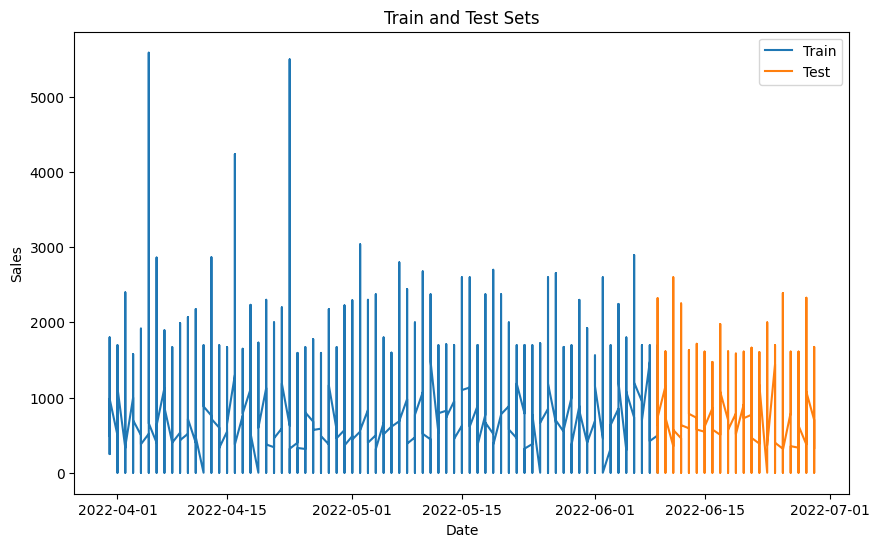

In [6]:
# Plot the training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(train['Amount'], label='Train')
plt.plot(test['Amount'], label='Test')
plt.title('Train and Test Sets')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

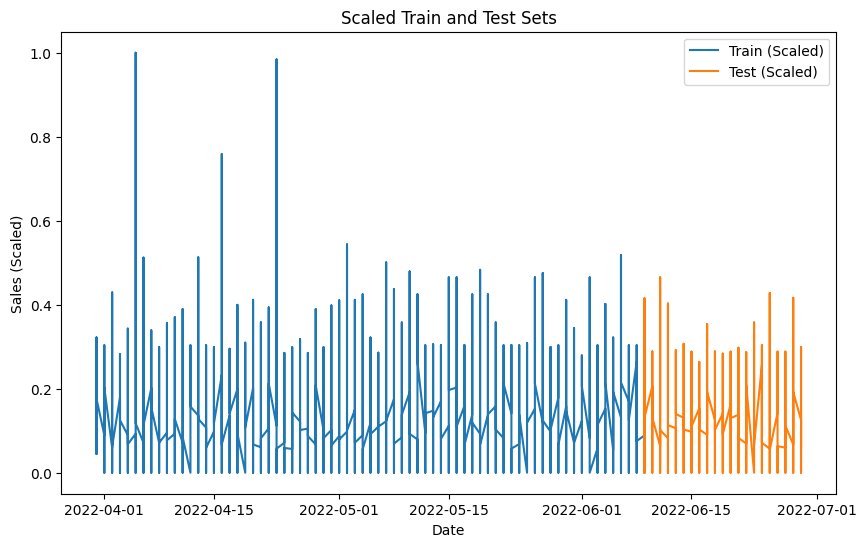

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Convert the scaled data back to a DataFrame to include the Date index
train_scaled_df = pd.DataFrame(train_scaled, index=train.index, columns=train.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test.index, columns=test.columns)



# Visualize the scaled data
plt.figure(figsize=(10, 6))
plt.plot(train_scaled_df['Amount'], label='Train (Scaled)')
plt.plot(test_scaled_df['Amount'], label='Test (Scaled)')
plt.title('Scaled Train and Test Sets')
plt.ylabel('Sales (Scaled)')
plt.xlabel('Date')
plt.legend()
plt.show()


In [8]:
# Now we need to get the letters for the ARIMA model
# We will use the ACF and PACF plots to determine the parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_scaled_df['Amount'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
p_value = result[1]



ADF Statistic: -33.398764133701995
p-value: 0.0


In [9]:
# The null hypothesis of the ADF test is that the time series is not stationary
# We can reject the null hypothesis if the p-value is less than 0.05, and it is 0
# The adf statistic is less than the critical values (0), so we can reject the null hypothesis

In [10]:
# Let the pmdarima library automatically suggest p, d, and q using a grid search.

from pmdarima import auto_arima
model = auto_arima(train_scaled_df['Amount'], seasonal=False, trace=True)#, error_action='ignore', suppress_warnings=True)
model.summary()


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.p

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=61.36 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-238512.348, Time=3.40 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-263749.354, Time=4.61 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.73 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-238514.348, Time=1.70 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-274318.605, Time=5.63 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-280006.492, Time=4.62 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-283556.689, Time=6.35 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-285959.206, Time=7.74 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-298131.974, Time=63.86 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-299206.567, Time=64.05 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-296753.368, Time=38.98 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-298153.098, Time=57.44 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-298602.361, Time=43.09 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=68.83 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=28.02 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 482.449 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                94902
Model:               SARIMAX(4, 1, 1)   Log Likelihood              149610.284
Date:                Wed, 08 Jan 2025   AIC                        -299206.567
Time:                        16:27:13   BIC                        -299140.343
Sample:                             0   HQIC                       -299186.423
                              - 94902                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.604e-06   2.37e-06     -1.946      0.052   -9.24e-06    3.35e-08
ar.L1          0.0711      0.003     22.710      0.000       0.065       0.077
ar.L2         -0.0254      0.003     -7.767      0.000      -0.032      -0.019
ar.L3         -0.0135      0.003     -4.135      0.000      -0.020      -0.007
ar.L4          0.0179      0.003      5.468      0.000       0.011       0.024
ma.L1         -0.9868      0.001  -1329.679      0.000      -0.988      -0.985
sigma2         0.0025    7.4e-06    338.152      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                 106.58   Jarque-Bera (JB):             70339.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
from pmdarima import auto_arima

model = auto_arima(
    train_scaled_df['Amount'],
    start_p=0,
    start_q=0,
    max_p=4,
    max_q=4,
    d=None,
    stepwise=False,
    seasonal=False,
    trace=True,
    #error_action='ignore',
    suppress_warnings=True,
    n_jobs=-1  # Paralelización
)

print(model.summary())

/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.p

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-238512.348, Time=3.49 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-263749.354, Time=4.72 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.88 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-274318.605, Time=4.31 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-297586.767, Time=24.17 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=31.62 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.76 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=38.30 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-280006.492, Time=4.62 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=57.98 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-283556.689, Time=6.63 sec


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=49.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-298591.938, Time=74.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-296753.368, Time=38.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-298602.361, Time=45.06 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-299129.284, Time=84.77 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=67.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=60.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-299206.567, Time=48.50 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 126.254 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                94902
Model:               SARIMAX(4, 1, 1)   Log Likelihood              149610.284
Date:                Wed, 08 Jan 2025   AIC                        -299206.567
Time:                        17:10:49   BIC                        -2

In [19]:
# Make predictions
forecast = model.predict(n_periods=len(test_scaled_df))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])
forecast.head()

/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Prediction
Date,
2022-06-09,NaN
2022-06-09,NaN
2022-06-09,NaN
2022-06-09,NaN
2022-06-09,NaN


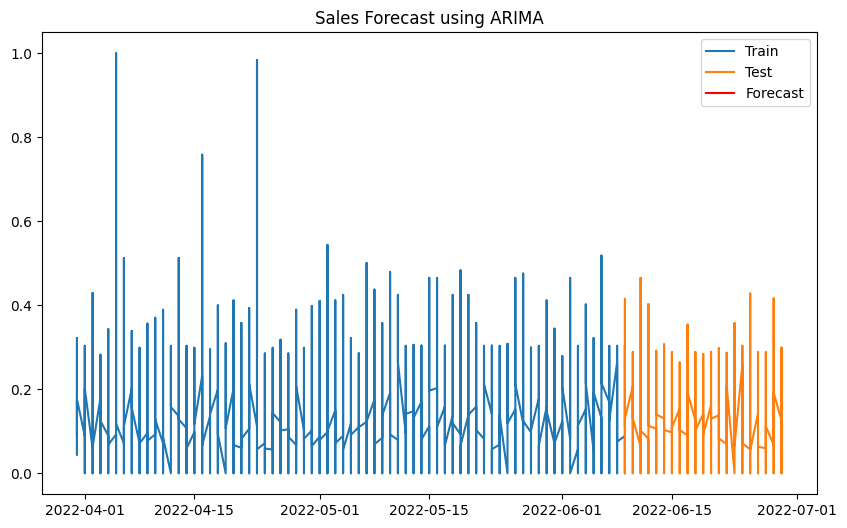

In [20]:


# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train_scaled_df['Amount'], label='Train')
plt.plot(test_scaled_df['Amount'], label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Sales Forecast using ARIMA')
plt.legend()
plt.show()

In [ ]:
# boxplot of amount per month


In [ ]:
# KPSS and ADF tests
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller


In [ ]:
# due to some assumptions of the tests, we differenced the data and repeated the tests


In [21]:
# STL decomposition, separate the trend, seasonality, and residuals
from statsmodels.tsa.seasonal import STL
stl = STL(train_scaled_df['Amount'], period=30)
stl

In [ ]:
# if seasonality is present, we can remove it by differencing the data by the festivity period